In [1]:
import pandas as pd
import numpy as np

In [70]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('/content/fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


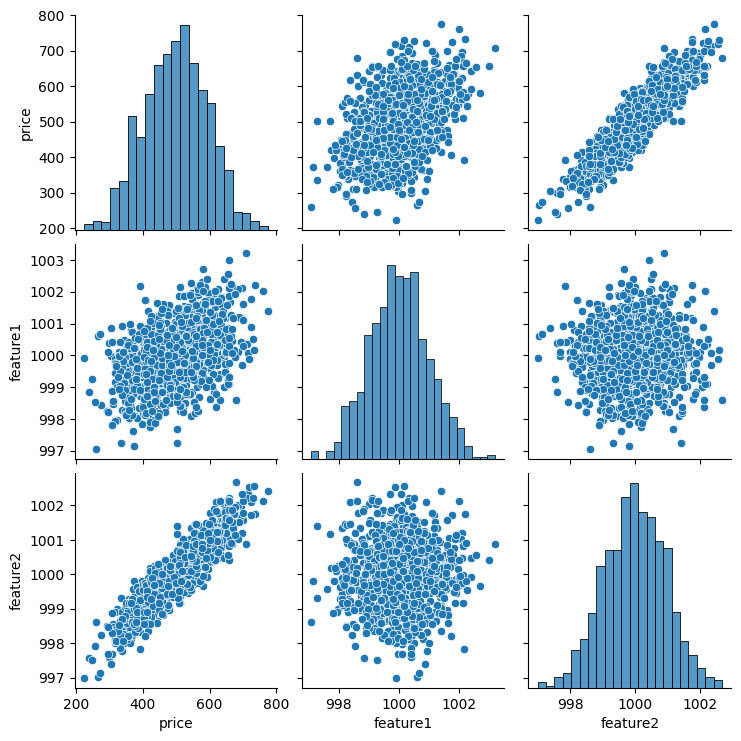

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

**TensorFlow works on Numpy array. So that's why we need to pass data using pandas dataframe or pandas series.**

In [8]:
X = df[['feature1', 'feature2']].values

In [9]:
y = df['price'].values

In [10]:
X  # Numpy array

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# help(MinMaxScaler)

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_train.max()

1.0

In [21]:
X_train.min()

0.0

**Note:** After using MinMaxScaler( ) function all data will be between 0-1.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# help(Sequential)

In [ ]:
# help(Dense)

In [ ]:
# # here create layers: using number of Nerons and activation for every layer
# model = Sequential([Dense(4, activation='relu'),
#                     Dense(2, activation='relu'),
#                     Dense(1, activation='relu')])
#                     # Here created 3 layer last one is
#                     # output layer

Another methodology and best methodology for create layer.

In [89]:
model = Sequential()

model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

model.add(Dense(1))
# in output layer, number of neuron or perceptron will depend on number of target class mean How many output varition in Target column

# This methodoloy is easy to edit every layer.


model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [90]:
model.fit(x=X_train, y= y_train, epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 261190.0156
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 257332.9375
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 261615.9531
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259198.6250
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253947.0469 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257377.1719 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 256863.6406 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 254844.3594 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 251237.5938 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255264.5781 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 250336.0938  
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 253531.2500 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 252691.3594 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 253

In [91]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

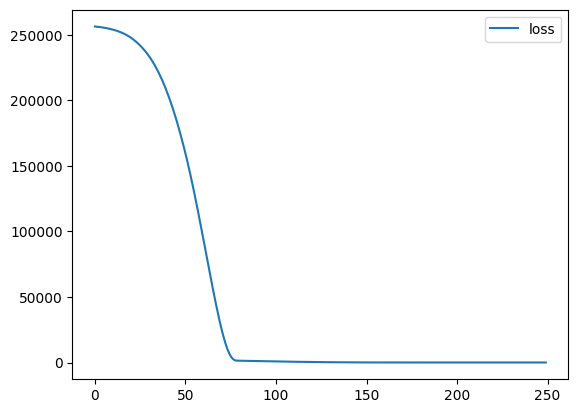

In [92]:
loss_df.plot()

In [93]:
model.evaluate(X_test, y_test, verbose=0) # here showing Mean Square Error, because we set in model.comple loss=mse

27.05336570739746

In [94]:
model.evaluate(X_train, y_train, verbose=0)

24.69937515258789

In [95]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [96]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [97]:
test_predictions

,0
0,406.315186
1,625.092896
2,593.633850
3,573.794128
4,367.402161
...,...
295,530.499939
296,516.624146
297,611.180969
298,418.068481


In [98]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [99]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [100]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [101]:
pred_df

,Test True Y,0
0,402.296319,406.315186
1,624.156198,625.092896
2,582.455066,593.633850
3,578.588606,573.794128
4,371.224104,367.402161
...,...,...
295,525.704657,530.499939
296,502.909473,516.624146
297,612.727910,611.180969
298,417.569725,418.068481


In [102]:
pred_df.columns=['Test True Y', "Model Predictions"]

In [103]:
pred_df

,Test True Y,Model Predictions
0,402.296319,406.315186
1,624.156198,625.092896
2,582.455066,593.633850
3,578.588606,573.794128
4,371.224104,367.402161
...,...,...
295,525.704657,530.499939
296,502.909473,516.624146
297,612.727910,611.180969
298,417.569725,418.068481


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

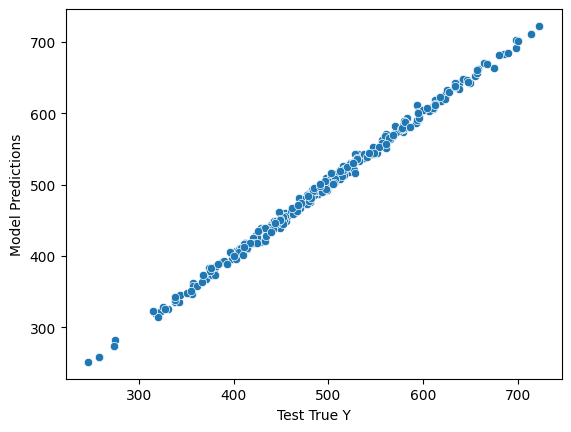

In [104]:
sns.scatterplot(x='Test True Y', y ='Model Predictions', data= pred_df)

In [105]:
results_df = pd.DataFrame({
    'True Y': y_test,
    'Model Predictions': test_predictions
})

In [106]:
print(results_df.head())

       True Y  Model Predictions
0  402.296319         406.315186
1  624.156198         625.092896
2  582.455066         593.633850
3  578.588606         573.794128
4  371.224104         367.402161


<Axes: >

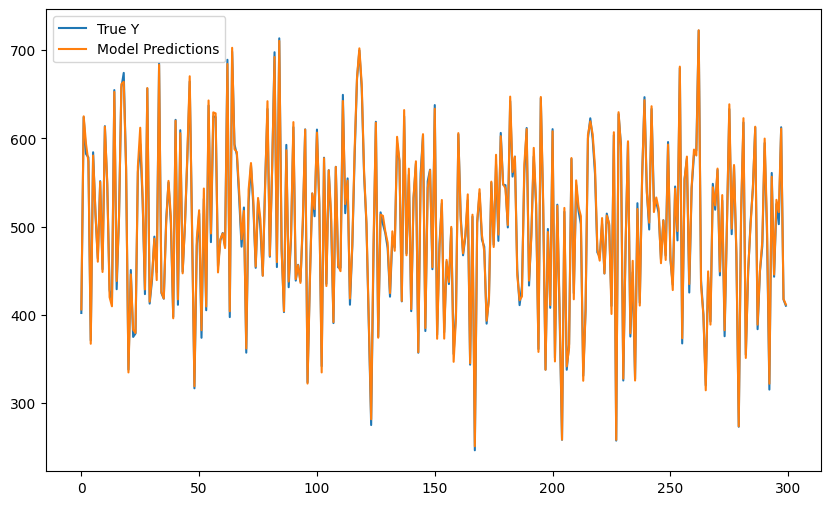

In [107]:
results_df.plot(figsize=(10, 6))

Verifying Data

In [108]:
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (300,)


In [109]:
print(type(test_predictions), test_predictions.shape)

<class 'pandas.core.series.Series'> (300,)


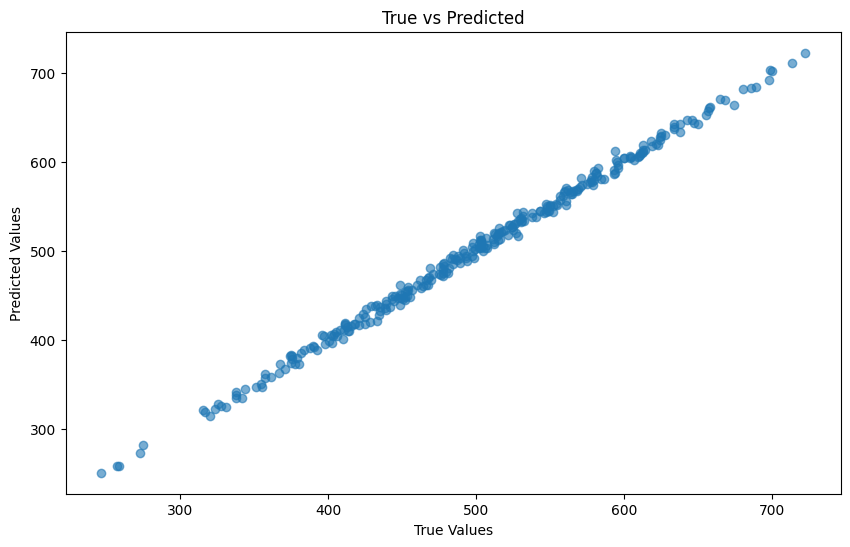

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['True Y'], results_df['Model Predictions'], alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted')
plt.show()

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [112]:
mean_absolute_error(y_test, test_predictions)

4.216947643822482

In [113]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


**Note:** Here seeing that, average of price and mean absolute error, thats mean here only 4 dollar difference, only 1%. can say this is good model for this dataset.

**Predict with new Data**

In [114]:
new_gem = [[998, 1000]]

In [115]:
new_gem = scaler.transform(new_gem)

In [116]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[420.68073]], dtype=float32)

**We can save model and use later in another dataset**

In [117]:
model.save('my_gem_model.h5')

In [118]:
from tensorflow.keras.models import load_model

In [119]:
later_model = load_model('my_gem_model.h5')

In [120]:
new_gem1 = [[998, 1000]]
new_gem1 = scaler.transform(new_gem1)
model.predict(new_gem1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[420.68073]], dtype=float32)